In [1]:
import matplotlib.pyplot as plt
from matplotlib import style, rcParams
from pandas_datareader import wb
import pandas as pd
import statsmodels.formula.api as smf
from src.utils import apply_matplotlib_settings

apply_matplotlib_settings()

In [2]:
gdp_matches = wb.search("gdp.*capita.*const").iloc[:, :2]
gdp_matches

,id,name
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
10980,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
10982,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
10984,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
10985,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation..."


In [3]:
cellphone_matches = wb.search("cell.*%").iloc[:, :2]
cellphone_matches

,id,name
8535,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%)
8590,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...


In [4]:
# gdp_per_cap = gdp_matches.loc[10980, "id"]
# gdp_per_cap_ppp = gdp_matches.loc[10984, "id"]
indicators = [
    *gdp_matches.loc[[10980, 10984], "id"],
    # gdp_matches.loc[10980, "id"],
    # cellphone_matches.loc[8590, "id"]
]
data = wb.download(indicator=indicators, country="all", start=2020, end=2020)
data.columns = ["gdp_nom", "gdp_ppp"]
data

,,gdp_nom,gdp_ppp
country,year,,
Africa Eastern and Southern,2020,1450.721534,3467.484700
Africa Western and Central,2020,1777.026501,3960.847898
Arab World,2020,5887.915493,13479.210424
Caribbean small states,2020,9166.622722,15037.804642
Central Europe and the Baltics,2020,14396.306274,31622.697023
...,...,...,...
Virgin Islands (U.S.),2020,35758.794755,NaN
West Bank and Gaza,2020,2922.468011,5402.538773
"Yemen, Rep.",2020,1057.281670,NaN


In [5]:
mod = smf.ols("gdp_nom ~ gdp_ppp", data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                gdp_nom   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1860.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          4.90e-115
Time:                        11:04:53   Log-Likelihood:                -2455.5
No. Observations:                 242   AIC:                             4915.
Df Residuals:                     240   BIC:                             4922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3849.1287    563.162     -6.835      0.0

In [6]:
search = wb.search("energy imports")
ind_code = search.iloc[0, :]["id"]
energy_imports_percent = wb.download(indicator=[ind_code], counktry="all")
energy_imports_percent.rename(
    columns={"EG.IMP.CONS.ZS": "energy_imports_%"}, inplace=True
)
energy_imports_percent

energy_imports_%
country                     year                  
Africa Eastern and Southern 2005        -35.939423
                            2004        -31.161816
                            2003        -32.419994
Africa Western and Central  2005       -108.528981
                            2004       -111.508331
...                                            ...
Zambia                      2004          7.348479
                            2003          6.126278
Zimbabwe                    2005          8.682759
                            2004          7.269228
                            2003          9.109144

[798 rows x 1 columns]

In [7]:
# grouped = energy_imports_percent.groupby("country").min()
# grouped.columns
# plt.bar(grouped.columns, height=grouped)
energy_imports_percent.index.get_level_values("year")

Index(['2005', '2004', '2003', '2005', '2004', '2003', '2005', '2004', '2003',
       '2005',
       ...
       '2003', '2005', '2004', '2003', '2005', '2004', '2003', '2005', '2004',
       '2003'],
      dtype='object', name='year', length=798)

In [8]:
only_2005 = energy_imports_percent.xs("2005", level=1)
only_2005

,energy_imports_%
country,
Africa Eastern and Southern,-35.939423
Africa Western and Central,-108.528981
Arab World,-255.422584
Caribbean small states,-76.069921
Central Europe and the Baltics,33.404633
...,...
Virgin Islands (U.S.),NaN
West Bank and Gaza,NaN
"Yemen, Rep.",-210.398796


<Axes: xlabel='country'>

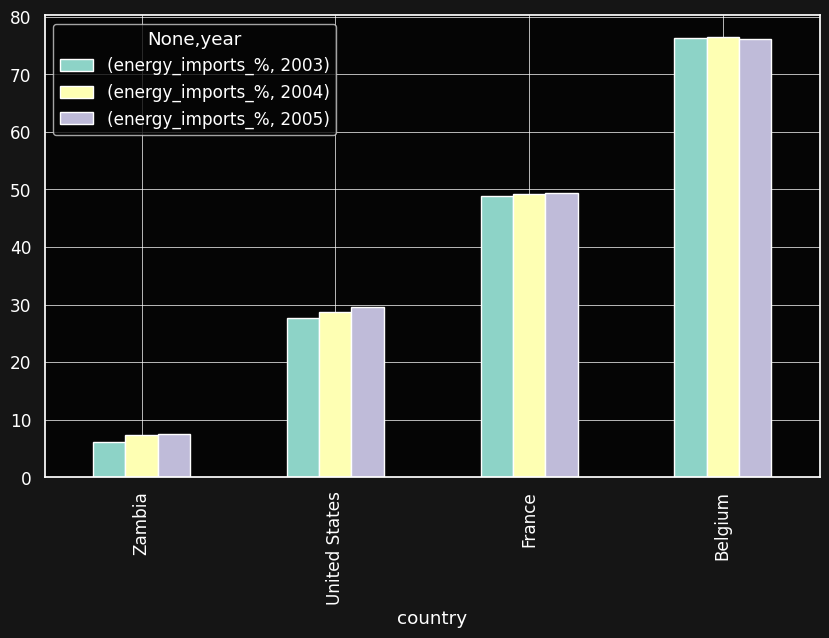

In [9]:
energy_imports_percent.unstack().loc[
    ["Zambia", "United States", "France", "Belgium"]
].plot(kind="bar")

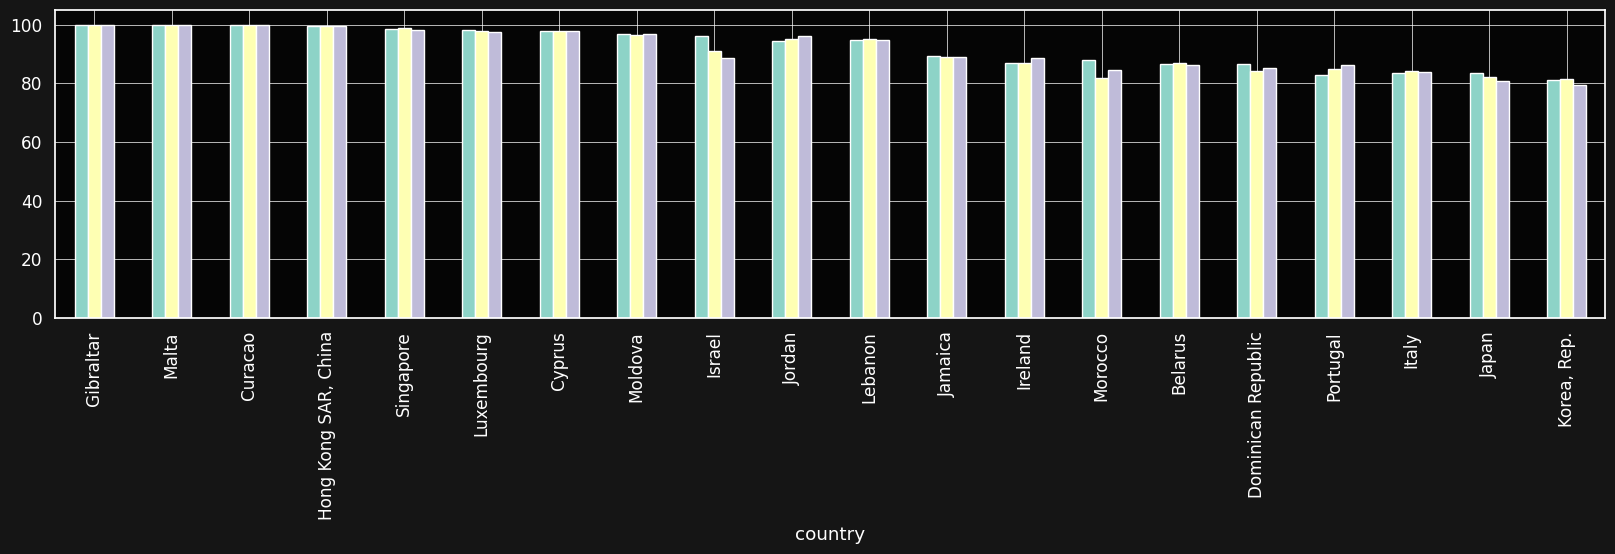

In [10]:
# style.use("dark_background")
fig, ax = plt.subplots(
    figsize=(20, 4),
)
energy_imports_percent.dropna().sort_values(
    by="energy_imports_%", ascending=False
).unstack().head(20).plot(kind="bar", ax=ax)
ax.get_legend().remove()
fig.show()